# Import and pre-definitions

In [1]:
import os
MAIN_PATH = r'/home/luis-felipe'
DATA_PATH = os.path.join(MAIN_PATH,'data')
PATH_MODELS = os.path.join(MAIN_PATH,'torch_models')
FIGS_PATH = os.path.join(MAIN_PATH,'results','figs')

In [2]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define o computador utilizado como cuda (gpu) se existir ou cpu caso contrário
print(torch.cuda.is_available())
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
torch.set_default_dtype(torch.float64)
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

True


In [4]:
import sys
sys.path.insert(1, '..')
sys.path.insert(1, '../..')

import models
from utils import measures,metrics
from data_utils import upload_logits,split_data
import post_hoc

# Evaluate logits

In [5]:
MODEL_ARC = 'vgg16'
DATASET = 'ImageNet'

In [6]:
logits,labels = upload_logits(MODEL_ARC,DATASET,PATH_MODELS, 
                            split = 'test', device = dev,data_dir = DATA_PATH)
risk = measures.wrong_class(logits,labels).float()

In [7]:
naurc_baseline = metrics.N_AURC(risk,measures.MSP(logits))
naurc_p = metrics.N_AURC(risk,post_hoc.MaxLogit_pNorm(logits,risk = risk))

# Histograms

## Baseline

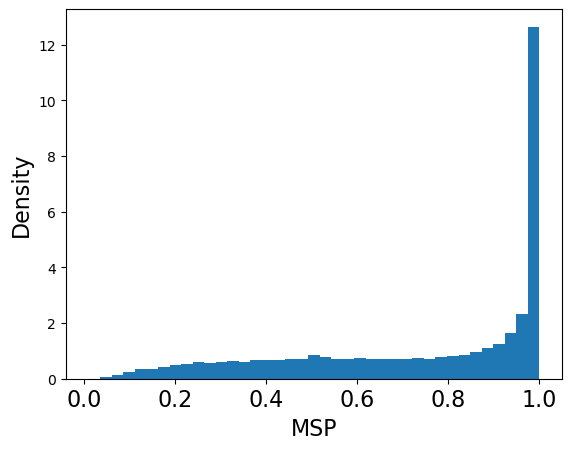

In [8]:
#plt.figure(figsize=(7,5))
plt.hist(measures.MSP(logits).cpu().numpy(),bins = 'auto', density = True)
plt.xlabel('MSP',fontsize = 16)
plt.ylabel('Density',fontsize = 16)
plt.tick_params(axis='x', which='major', labelsize=16)
#plt.title(f'NAURC gain = {naurc_baseline-naurc_p:.4f}')
plt.savefig(os.path.join(FIGS_PATH, f'histogram_msp_{MODEL_ARC}_{DATASET}.pdf'), transparent = True, format = 'pdf',bbox_inches = 'tight')
plt.show()

## Optimized

### MaxLogit-p

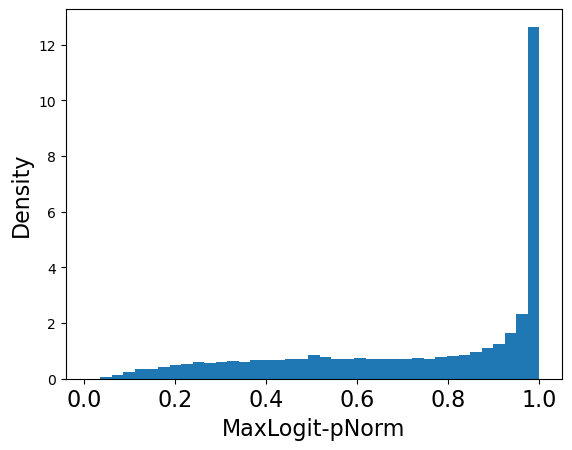

In [9]:
#plt.figure(figsize=(7,5))
plt.hist(post_hoc.MaxLogit_pNorm(logits,risk = risk).cpu().numpy(),bins = 'auto', density = True)
plt.xlabel('MaxLogit-pNorm',fontsize = 16)
plt.ylabel('Density',fontsize = 16)
plt.tick_params(axis='x', which='major', labelsize=16)
#plt.title(f'NAURC gain = {naurc_baseline-naurc_p:.4f}',fontsize = 12)
plt.savefig(os.path.join(FIGS_PATH, f'histogram_optimized_{MODEL_ARC}_{DATASET}.pdf'), transparent = True, format = 'pdf',bbox_inches = 'tight')
plt.show()